# Problema 1

Realize un programa que encuentre todas las ces  de  una  función  en  un  intervalo  cerrado  bajo  la
suposición de que la función realiza oscilaciones y entre cada oscilación hay al menos una raíz.  Ponga
en práctica esta función y encuentre todas las raíces de la siguiente función:
$y(x) = cosx+\frac{6}{5}sin(x^2)$ en el intervalo $(0,2\pi)$.

Para resolver este problema, que también nos servirá para el problema 2, necesitamos una función que tenga como argumentos la ecuación de la cual deseamos hallar las raíces y el intervalo donde lo deseamos hacer. Para esto subdividiremos el intervalo en n subintervalos iguales, que puede ser especificado por el usuario. Buscamos cambios de signo en la ecuación al comparar sus valores en los extremos del intervalo.

En primer lugar, definimos una función que, dada otra función $f(x)$ y un intervalo $[x_1,x_2]$ utilize el método de bisección para hallar una raíz de la función en ese intervalo. Por lo pronto no vamos considerar los casos en los que la función dada no tiene ninguna raíz en dicho intervalo,i.e. asumiremos que hay por lo menos una raiz en el intervalo.

In [2]:
import numpy as np
import pylab as pl

In [3]:
def biseccion(funcion,intervalo,nmax=20,error=1e-5): #(la función, intervalo [x1,x2],no máximo de pasos ,error permitido) 
    """
    Utiliza el método de biparticion para hallar una raíz de una funcion de una variable en el intervalo [x1,x2] 
    dado como una lista de dos valores en el dominio. No importa si x1<x2 o x2<x1. 
    Como argumentos opcionales toma el numero de pasos a realizar, con el fin de evitar un loop infinito, y el error
    máximo permitido. Este error se usa para evaluar el ancho del intervalo en x de la ultima iteracion.
    Esta funcion asume que hay almenos una raiz en el intervalo especificado, por lo que siempre regresa un valor.
    """
    if intervalo[0]<=intervalo[1]: #primero aseguramos que xi<=xd
        xi=intervalo[0] 
        xd=intervalo[1]
    else:
        xi=intervalo[1]
        xd=intervalo[0]     
    n=1
    while n<=nmax:
        xm = 0.5*(xi+xd)
        if funcion(xm)==0 or 0.5*(xd-xi)<error: #si la funcion es cero o los puntos estan muy cerca entre sí
            break
        else:
            n+=1
            if funcion(xi)*funcion(xm)>0: #no hay cambio de signo en la 1a mitad del intervalo
                xi=xm
            else: #si hay cambio de signo en la 1a mitad del intervalo
                xd=xm
   
    return xm

Para evitar que la función nos regrese una raiz donde no la hay al buscar todas las raices de $f(x)$ en un intervalo debemos escoger los intervalos en los cuales realicemos la búsqueda. Para esto definimos otra función que halle dónde hay un cambio de signo en  $f(x)$. Debe tener como argumentos a $f(x)$, el intervalo $[x_1,x_2]$ y  el número de subdivisiones del intervalo. Para esto basta fijarnos en qué puntos de la subdivisión hay cambio de signo en $f(x)$.

In [4]:
def particion(funcion,intervalo,subdivisiones=20): #(la función, intervalo [x1,x2],no de subintervalos)
    """
    Genera una particion del intervalo [x1,x2] dado como una lista de dos puntos en el dominio. 
    Subdivide el intervalo en un numero arbitrario de subintervalos y regresa los puntos de la particion donde hay un cambio
    de signo en la funcion o donde esta cruza el cero en forma de array. 
    La funcion debe ser de una variable.
    Los puntos lo arregla en pares de modo que si hay cambio de signo en [xi,xi+1] y en [xi+1,xi+2] da [xi,xi+1,xi+1,xi+2].
    De este modo, el largo del array que regresa siempre sera un numero par.
    """
    x=np.linspace(intervalo[0],intervalo[1],subdivisiones)
    indices=[] #inicializa la lista de índices como una lista vacía
    
    for i in xrange(len(x)-1):
        if funcion(x[i])*funcion(x[i+1])<=0: #si hay cambio de signo o f es cero en alguno de los extremos
            indices+=[i,i+1]
    puntos=x[indices]
    return puntos

Finalmente agrupamos esto en una sola funcion que regrese todas la raices que halle al usar el metodo de bisección en los intervalos hallados durante la bipartición.

In [5]:
def raices(funcion,intervalo,subdivisiones=20,nmax=20,error=1e-5):
    """
    Calcula las raices de la funcion en un intervalo utilizando el metodo de biseccion. Subdivide el intervalo en un numero
    arbitrario de subintervalos y luego utiliza el metodo de biseccion solo donde hay cambio de signo en la funcion.
    Regresa las raices que arroja el metodo de biseccion en forma de array.
    """
    puntos=particion(funcion,intervalo,subdivisiones)
    raices=np.zeros(len(puntos)/2)
    
    for i in xrange(len(puntos)/2):
        subintervalo=[puntos[2*i],puntos[2*i+1]]
        raices[i]=biseccion(funcion,subintervalo,nmax,error)
    return raices    

Ahora definimos la función que es de nuestro interés para verificar el funcionamiento del método que acabamos de programar. Utilizamos la librería *timeit* para investigar cuánto dura la ejecución de cada una de nuestras funciones.

In [6]:
def fun(x):
    y= np.cos(x)+(6.0/5.0)*np.sin(x**2)
    return y

In [7]:
import timeit

In [8]:
intervalo=[0,4*np.pi]
%time puntos=particion(fun,intervalo,1000)
%time biseccion(fun,[puntos[0],puntos[1]],nmax=100,error=1e-15)
%time raices(fun,intervalo,1000,nmax=100,error=1e-15)
print("Este método parece ser bastante eficiente")

Wall time: 8 ms
Wall time: 1e+03 µs
Wall time: 26 ms
Este método parece ser bastante eficiente


Ahora graficamos la función y las raices encontradas para verificar visualmente los resultados

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

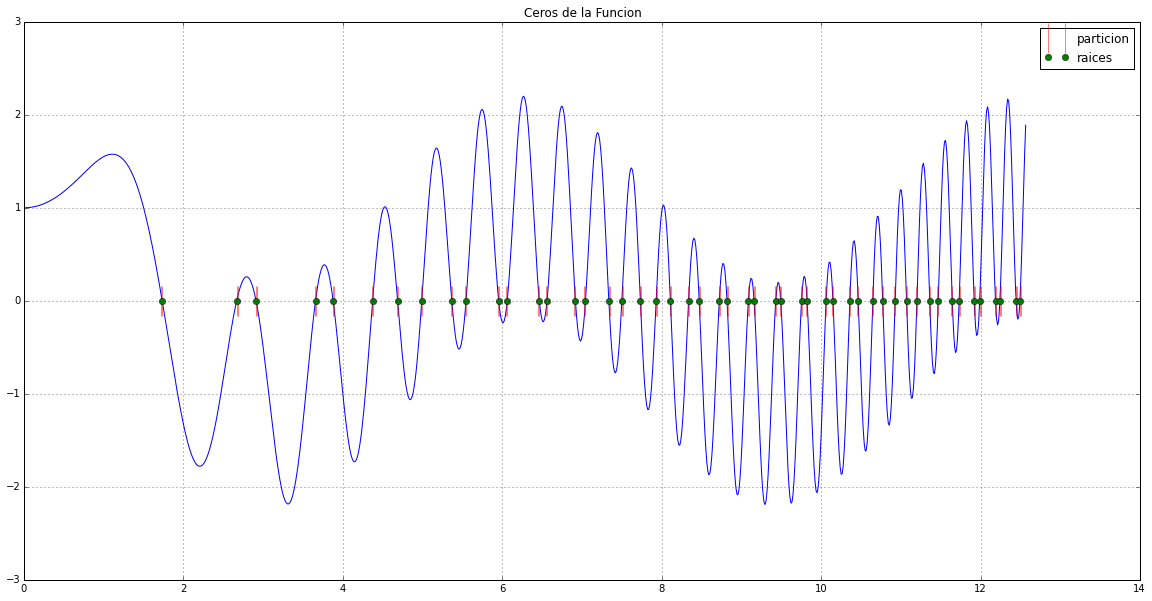

In [10]:
x=np.linspace(0,4*np.pi,1000)
y=fun(x)
puntos=particion(fun,intervalo,1000)
ceros=raices(fun,intervalo,1000)

plt.figure(figsize=(20,10))
plt.plot(x,y,color="blue")
plt.plot(puntos,np.zeros_like(puntos),'|',markersize=30,color="red",label="particion") 
plt.plot(ceros,np.zeros_like(ceros),'o',color="green",label="raices")
plt.title('Ceros de la Funcion')
plt.grid()
plt.legend()
plt.show()

# Problema 2

Se tiene la siguiente función:

$$f(x,y)=2e^{-(x+1)^2}(e^{-(y+2)^2}+e^{-(y-2)^2})+6x(x^2+y^2)e^{-(x^2+y^2)}-1$$

Encuentre los puntos $(\tilde{x},\tilde{y})$ tales que $f(\tilde{x},\tilde{y})=0$ y dibuje estos puntos en el plano $xy$.

Hint: En general, estos puntos se encuentran en la región $x,y \in (-4,4) \times(-4,4)$. Una forma de obtener
los puntos es haciendo un barrido para $x$ fija y encontrando todas las raíces de la ecuación en términos de $y$.  Entre más
fino haga el barrido, la curva de nivel que se encuentre será mejor.

Comenzamos por definir un algoritmo que halle las raices de una funcion de dos variables. Esta dependerá de la función *raices* que definimos en el problema anterior.

In [11]:
def raices2D(funcion,intervalox,intervaloy,subdivisiones=20,nmax=20,error=1e-5):
    """
    Toma como argumento una función de dos variables, en donde se especifican los intervalos en x y en y.
    Fijando una x dentro del intervalo, halla las raices de la funcion barriendo y. Hace esto para cada x en el intervalo
    y va juntando las raices encontradas en cada caso.
    """
    x=np.linspace(intervalox[0],intervalox[1],subdivisiones)
    raices_totales=np.zeros((0,2))
    
    for (i,xi) in enumerate(x):
        funciony = lambda y: funcion(xi, y) #crea una funcion local que es la funcion original con la 1a entrada fija en xi 
        raicesy=raices(funciony,intervaloy,subdivisiones,nmax,error) #encontramos las raices barriendo y con x fija en xi
        raices_nuevas=np.zeros((len(raicesy),2))
        raices_nuevas[:,0]=xi #la 1a coordenada de todas las entradas es xi
        raices_nuevas[:,1]=raicesy #la 2a coordenada son las raices que hallamos
        raices_totales=np.concatenate((raices_totales,raices_nuevas)) #añadimos las raices que hallamos para xi
    return raices_totales

Ahora definimos la función dada por el problema, $f(x,y)$, y utilizamos el método que acabamos de programar para obtener y graficar las raices de la funcion.

In [12]:
def foo(x,y):
    return 2*np.exp(-(x+1)**2)*(np.exp(-(y+2)**2)+np.exp(-(y-2)**2)) + 6*x*(x**2+y**2)*(np.exp(-(x**2+y**2)))-1

In [13]:
intervalox=[-4,4]
intervaloy=[-4,4]
%time misraices=raices2D(foo,intervalox,intervaloy,subdivisiones=1000,nmax=50,error=1e-10)
print("La funcion ahora itera sobre una malla de un millon de puntos por lo que el tiempo es mucho mayor")

Wall time: 21.4 s
La funcion ahora itera sobre una malla de un millon de puntos por lo que el tiempo es mucho mayor


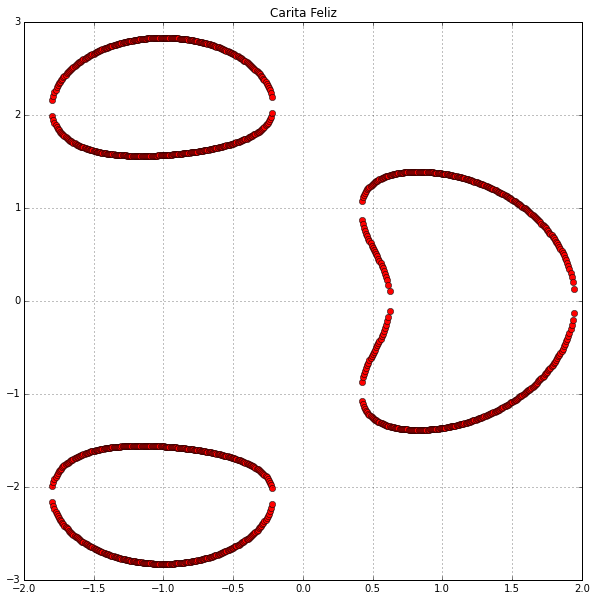

In [14]:
plt.figure(figsize=(10,10))
plt.plot(misraices[:,0],misraices[:,1],'o',color="red")
plt.title('Carita Feliz')
plt.grid()
plt.show()

# Problema 3

Se tiene una pelota de masa $m$ sobre un plano inclinado a un ángulo $\alpha = 15°,30°$ y $45°$. 

   *a)*Dibuje la trayectoria de la pelota si es lanzada desde el plano inclinado, en dirección descendiente del plano con velocidad inicial $v_{0x},v_{0y}>0$, considerando que hay fricción proporcional a la norma de la velocidad
   
   *b)*Realice la misma simulación con la fricción proporcional al cuadrado de la norma de la velocidad.
   
   *c)* ¿Qué sucede si ahora la pelota es lanzada con velocidad inicial $v_{0x}$ tal que $tan^{-1}(\frac{v_{0y}}{v_{0x}})>\alpha$?, i.e. ¿Qué sucede cuando se lanza hacia arriba del plano.
   
Realice las gráficas que representan las simulaciones. Puede suponer $m=1$ y valores adecuados para los coeficientes de fricción.

Para este inciso nos basaremos en el código que utilizamos en clase, donde no había un plano inclinado. En primer lugar, utilizaremos el método de Runge-Kutta de 4o orden que habíamos programado en la tarea 1, al igual que las funciones de friccion que programamos en clase.

In [15]:
def arg_rk4(funcion,x0,tlist,args=0,h=0.1):
    """
    Funcion de Integracion por el Metodo de Runge-Kutta a 4o orden. Sus argumentos son: la funcion de la ecuacion diferencial,
    el valor de la funcion al tiempo inicial x0,una lista con el tiempo inicial y el final tlist=[ti,tf] y 
    el paso de integracion como argumento opcional. 
    Puede tener una lista de parametros opcionales args que se pasan a la funcion de la ecuacion diferencial.
    Regresa los tiempos y sus respectivos valores de la funcion como una tupla de arrays t,x. 
    Cabe notar que la funcion, el jacobiano y x0 pueden tomar valores vectoriales, los cuales se representan por arrays.
    Tambien, la funcion debe tener ordenados los parámetros de la forma g(t,x).
    """
    if (tlist[1]-tlist[0])<10.0*h:   #cambia el valor de h para garantizar que se hagan almenos 10 iteraciones
        h=(tlist[1]-tlist[0])*0.1
    tiempos=np.arange(tlist[0],tlist[1],h) #regresa un array
    x = np.zeros((len(tiempos),len(x0)))#regresa otro array del ancho de la dimension de x0 y el largo del array de tiempos)
    x[0,:] = x0 #x[tiempo,coordenada],:==todas las coordenadas
    if args == 0:  #no hay argumentos opcionales dados    
        for i in xrange(0,len(tiempos)-1):
            k1=funcion(tiempos[i],x[i,:])
            k2=funcion(tiempos[i]+0.5*h,x[i,:]+0.5*h*k1)
            k3=funcion(tiempos[i]+0.5*h,x[i,:]+0.5*h*k2)
            k4=funcion(tiempos[i]+h,x[i,:]+h*k3)
            x[i+1,:]=x[i,:]+(1/6.0)*h*(k1+2*k2+2*k3+k4)    
    else:
        for i in xrange(0,len(tiempos)-1):
            k1=funcion(tiempos[i],x[i,:],args)
            k2=funcion(tiempos[i]+0.5*h,x[i,:]+0.5*h*k1,args)
            k3=funcion(tiempos[i]+0.5*h,x[i,:]+0.5*h*k2,args)
            k4=funcion(tiempos[i]+h,x[i,:]+h*k3,args)
            x[i+1,:]=x[i,:]+(1/6.0)*h*(k1+2*k2+2*k3+k4)    
    return tiempos,x 
#regresa una tupla, que la hace inmutable a diferencia de una lista y que, a diferencia de un array, 
#cada entrada puede ser de distinto tipo (heterogéneas)

Queremos hallar la solución de la ecuación diferencial para $x(t)$ dada por:

$$m\ \ddot{\vec{x}} =\vec{f}(\dot{\vec{x}})-\vec{g},\quad i.e. \quad \ddot{\vec{x}} =\frac{\vec{f}(\dot{\vec{x}})}{m}-\frac{\vec{g}}{m}$$
donde $\vec{f}(\dot{\vec{x}})$ es la fricción que el aire ejerce sobre el objeto y se tienen condiciones iniciales 
$\vec{x}(0)=\vec{x_0}\ $ y $\vec{x}(0)=\vec{v_0}$.

Para esto hacemos el cambio de variable $\begin{cases}\vec{x_1}=\vec{x}(t) \\\vec{x_2}=\dot{\vec{x}}(t) \end{cases} \Rightarrow \dot{\vec{x_2}}=\ddot{\vec{x}}(t)$. Entonces, se tiene que $\begin{cases}\dot{\vec{x_1}}=\vec{x_2} \\ \dot{\vec{x_2}}=\frac{\vec{f}(\dot{\vec{x}})}{m}-\frac{\vec{g}}{m} \end{cases}$

Por tanto, el sistema se puede escribir como $\dot{\vec{X}}=\vec{G}(t,\vec{X})$, con $\vec{X}=(\vec{x_1},\vec{x_2})=(x,y,vx,vy)$ y $\vec{G}=(\vec{x_2},\frac{\vec{f}(\dot{\vec{x}})}{m}-\frac{\vec{g}}{m} )=(vx,vy,\frac{f_x(\dot{\vec{x}})}   {m},\frac{f_y(\dot{\vec{x}})}{m}-\frac{g}{m})$.

In [16]:
def ec_mov(t,r_v,fric=0,g=9.8,m=1): #r_v=(x,t,vx,vy)
    dx = r_v[2]
    dy = r_v[3]
    if fric == 0:
        dvx,dvy = 0,-(g/m)
        # "No use un modelo de friccion"
    else:
        dvx = - fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]/m
        # "Use un modelo de friccion"
    return np.array([dx,dy,dvx,dvy])

Ahora definimos nuestras funciones que dan la fricción: el caso trivial, fircción proporcional a la velocidad y fricción proporcional al cuadrado de esta. Graficamos para ver que en efecto funcionan las funciones que acabamos de implementar.

In [17]:
def fricNul(v):
    return np.array([0,0])

def fricV1(v, gamma = 0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return np.array([f_x,f_y])

def fricV2(v, gamma = 0.1):
    norma = np.sqrt(v[0]**2+v[1]**2)
    f_x = gamma*norma*v[0]
    f_y = gamma*norma*v[1]
    return np.array([f_x,f_y])

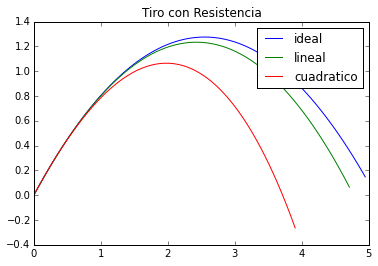

In [18]:
p = [0,0,5,5]
paso=0.01
t,sol_id = arg_rk4(ec_mov, p, [0,1],h=paso)
plt.plot(sol_id[:,0], sol_id[:,1],label="ideal")
t,sol_fr = arg_rk4(ec_mov, p, [0,1], fricV1,h=paso)
plt.plot(sol_fr[:,0], sol_fr[:,1], label = "lineal")
t,sol_fr = arg_rk4(ec_mov, p, [0,1], fricV2,h=paso)
plt.plot(sol_fr[:,0], sol_fr[:,1], label = "cuadratico")
plt.title('Tiro con Resistencia')
plt.legend()
plt.show()

Ahora procederemos a definir las funciones que conforman el algoritmo para trazar la trayectoria del cuerpo. La idea es realizar el proceso de integración por Runge-Kuta de 4o orden en intervalos pequeños de tiempo $dt_{global}$. Al final de la integración, comparamos los puntos final e inicial de la trayectoria para ver si hay un cruce con el plano inclinado. Si no es así, se realizan más integraciones durante un intervalo $dt_{global}$ y se repite el proceso hasta un número límite de iteraciones. En este caso se toma el punto final de la integración anterior como el inicial de la siguiente integración.

Por otro lado, si en uno de los procesos de integración se encuentra que la solución cruzó el plano, se regresa al punto inicial del éste último proceso y se realiza una nueva integración refinada para encontar el punto exacto donde la trayectoria cruzó el plano. Esto se hace mediante el método de biseccion, pero la función no esta dada y se reconstruye mediante la integración. Una vez que se halla el punto en donde la trayectoria cruza el plano, se refleja la velocidad con respecto al plano y se resume la integración global hasta terminar las iteraciones o tener un nuevo rebote.

Comenzamos por hallar la función que nos da la velocidad después del rebote con el plano. Por conservación del momento esta es simplemente una reflexión de la velocidad en torno a la linea que define el plano inclinado. Sea $\vec{v}_i$ la velocidad del objeto incidente, $\vec{v}_r$ la velocidad justo después del rebote y $\vec{n}$ un vector normal al plano. Si descomponemos a $\vec{v}_i$ en sus componentes tangencial y normal al plano tenemos que: $$\vec{v}_i=(\vec{v}_i \cdot \hat{n})\hat{n}+[\vec{v}_i - (\vec{v}_i \cdot \hat{n})\hat{n}]$$
Dado que $\vec{v}_r$ es símplemente la inversión de la componente normal se tiene que:
$$\vec{v}_r=-(\vec{v}_i \cdot \hat{n})\hat{n}+[\vec{v}_i - (\vec{v}_i \cdot \hat{n})\hat{n}]= \vec{v}_i - 2(\vec{v}_i \cdot \hat{n})\hat{n}=\vec{v}_i - {2 \vec{v}_i \cdot \vec{n}\over \|\vec{n}\|^2}\vec{n}$$

Sabemos que el vector tangente al plano es $\vec{t}=(1,m)$, con $m=tan(\alpha)$, por lo que $\vec{n}=(-m,1)$. Al sustituir esto en la ecuación anterior y hacer las cuentas se obtiene que:
$$\begin{cases}v_{rx}=v_{ix}cos(2\alpha)-v_{iy}sen(2\alpha)\\v_{ry}=-v_{iy}cos(2\alpha)-v_{ix}sen(2\alpha) \end{cases}$$

In [84]:
def reflexion_velocidad(punto,alpha):
    """
    Toma el ultimo punto de la trayectoria,donde esta cruza el plano, y el angulo que el plano forma con la horizontal
    Regresa el punto en la misma posicion espacial, pero refleja su velocidad respecto al plano para obtener el rebote.
    """
    x = punto[0]
    y = punto[1]
    vx = punto[2]*np.cos(2*alpha)-punto[3]*np.sin(2*alpha)
    vy = -punto[3]*np.cos(2*alpha)-punto[2]*np.sin(2*alpha)
    return np.array([x, y, vx, vy])

In [86]:
def rebote_alpha(punto_actual,condicion_inicial_global,mi_dt,alpha,args=0,error=1e-5):
    """
    Halla el punto en donde la trayectoria cruza el plano. Solo requiere el punto inicial de la integracion global y
    el ancho de su intervalo de integracion. Para este punto ya sabemos que hay un cruce con el plano en el siguiente 
    tiempo mi_dt. Se usa la biseccion en el dominio para hallar el punto de cruce.
    Como argumento opcional toma el error que sera la maxima diferencia permitida entre el cruce hallado y el plano.
    """
    dt_busqueda = mi_dt/2
    y_izq = punto_actual #punto inicial del proceso de integracion actual
    p_ini=condicion_inicial_global #punto inicial de toda la integracion (global)
    if args==0:
        t,sol = arg_rk4(ec_mov,y_izq,[0,dt_busqueda])
    else:
        t,sol = arg_rk4(ec_mov,y_izq,[0,dt_busqueda],args)
    y_med = sol[-1,:]#toma el ultimo punto de la integracion como el valor de la solucion en el punto medio
    
    while abs(y_izq[1]-(p_ini[1] - np.tan(alpha)*y_izq[0])) > error:
        if((y_izq[1]-(p_ini[1]-np.tan(alpha)*y_izq[0]))*(y_med[1]-(p_ini[1]-np.tan(alpha)*y_med[0])))<=0:#hubo un cruce
            reinicio = y_izq
        else:
            reinicio = y_med
            
        dt_busqueda = dt_busqueda/2
        if args==0:
            t,sol = arg_rk4(ec_mov,reinicio,[0,dt_busqueda])
        else:
            t,sol = arg_rk4(ec_mov,reinicio,[0,dt_busqueda],args)
        y_izq = reinicio
        y_med = sol[-1,:]
    return y_izq

In [92]:
def trayectoria_con_rebote(inicio,alpha,args=0,N=100,mi_dt=0.1,error=1e-5):
    """
    Realiza integracion de la trayectoria mediante RK4. Si encuentra un cruce con el plano, calcula el rebote y 
    continua la integracion. Requiere que se le especifique el angulo del plano con la horizontal. 
    A si mismo, puede tomar argumentos que se pasan al integrador de RK4.
    """
    alpha=np.pi*alpha/180 #pasar alpha a radianes
    trayectoria = np.zeros((N,len(inicio)))
    trayectoria[0,:] = np.array(inicio)
    for i in xrange(N-1):
        if args==0:
            t,sol_dt = arg_rk4(ec_mov,trayectoria[i,:],[0,mi_dt])
        else:
            t,sol_dt = arg_rk4(ec_mov,trayectoria[i,:],[0,mi_dt],args)
        
        if sol_dt[-1,1] <= trayectoria[0,1] - np.tan(alpha)*sol_dt[-1,0]: #si hay cruce con el plano
            punto_de_cruce=rebote_alpha(trayectoria[i,:],inicio,mi_dt,alpha,args,error)   
            trayectoria[i+1,:] = reflexion_velocidad(punto_de_cruce,alpha)
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]
    return trayectoria

Ahora procederemos a graficar las soluciones para los distintos casos de fricción y condiciones iniciales.

**a)** Utilizamos fricción proporcional a la norma de la velocidad (*fricV1*) y $\alpha=0°,15°,30°,45°$.

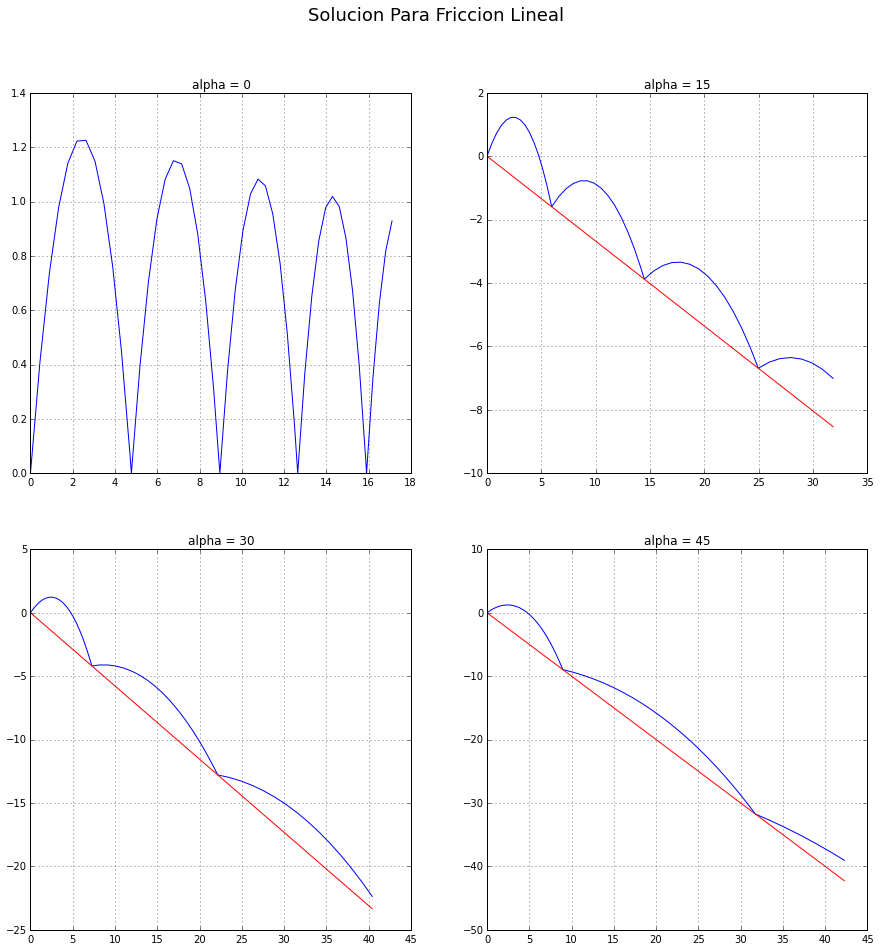

In [127]:
inicio = [0,0,5,5]
N = 50 #numero de integraciones globales
Alphas=[0,15,30,45]


fig = plt.figure(figsize=(15,15))
fig.suptitle("Solucion Para Friccion Lineal",fontsize=18)

sol1=trayectoria_con_rebote(inicio,Alphas[0],fricV1,N)
x1=np.linspace(inicio[0],sol1[-1,0],10*N)
plano1=inicio[1]-np.tan(np.pi*Alphas[0]/180)*x1
ax1 = fig.add_subplot(2,2,1)
ax1.set_title('alpha = {}'.format(Alphas[0]))
ax1.plot(sol1[:,0],sol1[:,1],color="blue")
ax1.plot(x1,plano1,color="red")
plt.grid()

sol2=trayectoria_con_rebote(inicio,Alphas[1],fricV1,N)
x2=np.linspace(inicio[0],sol2[-1,0],10*N)
plano2=inicio[1]-np.tan(np.pi*Alphas[1]/180)*x2
ax2 = fig.add_subplot(2,2,2)
ax2.set_title('alpha = {}'.format(Alphas[1]))
ax2.plot(sol2[:,0],sol2[:,1],color="blue")
ax2.plot(x2,plano2,color="red")
plt.grid()

sol3=trayectoria_con_rebote(inicio,Alphas[2],fricV1,N)
x3=np.linspace(inicio[0],sol3[-1,0],10*N)
plano3=inicio[1]-np.tan(np.pi*Alphas[2]/180)*x3
ax3 = fig.add_subplot(2,2,3)
ax3.set_title('alpha = {}'.format(Alphas[2]))
ax3.plot(sol3[:,0],sol3[:,1],color="blue")
ax3.plot(x3,plano3,color="red")
plt.grid()

sol4=trayectoria_con_rebote(inicio,Alphas[3],fricV1,N)
x4=np.linspace(inicio[0],sol4[-1,0],10*N)
plano4=inicio[1]-np.tan(np.pi*Alphas[3]/180)*x4
ax4 = fig.add_subplot(2,2,4)
ax4.set_title('alpha = {}'.format(Alphas[3]))
ax4.plot(sol4[:,0],sol4[:,1],color="blue")
ax4.plot(x4,plano4,color="red")
plt.grid()

plt.show()

**b)** Utilizamos fricción proporcional al cuadrado la norma de la velocidad (*fricV2*) y $\alpha=0°,15°,30°,45°$.

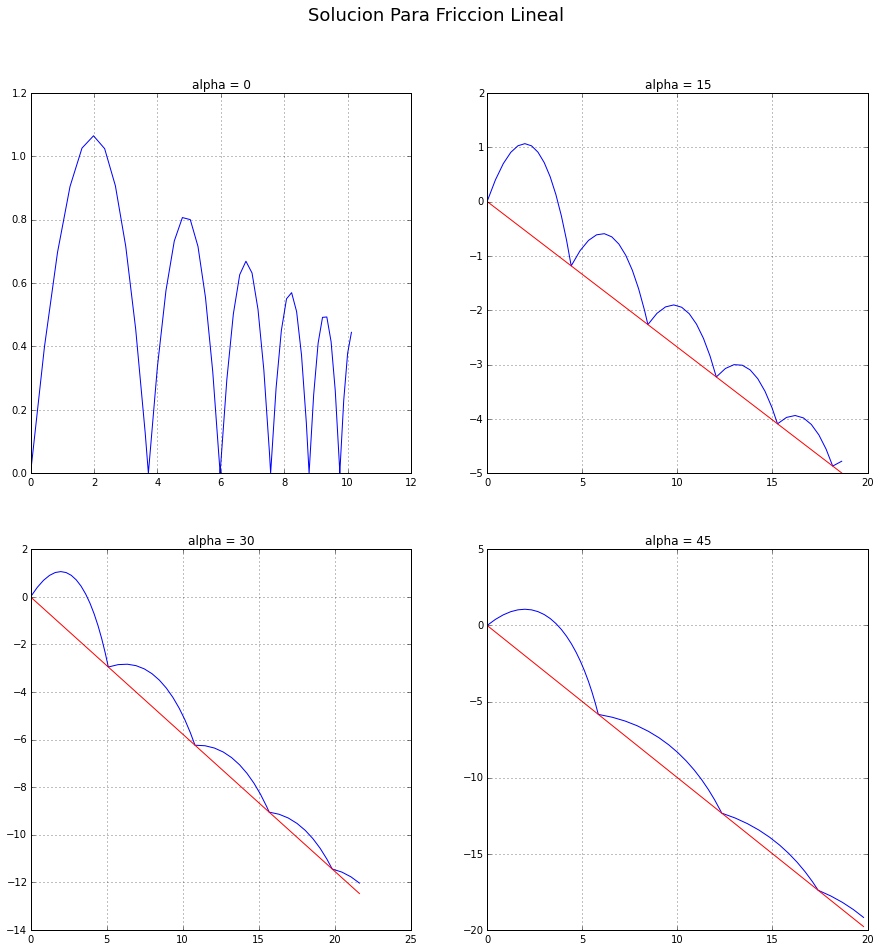

In [128]:
inicio = [0,0,5,5]
N = 50 #numero de integraciones globales
Alphas=[0,15,30,45]


fig = plt.figure(figsize=(15,15))
fig.suptitle("Solucion Para Friccion Cuadratica",fontsize=18)

sol1=trayectoria_con_rebote(inicio,Alphas[0],fricV2,N)
x1=np.linspace(inicio[0],sol1[-1,0],10*N)
plano1=inicio[1]-np.tan(np.pi*Alphas[0]/180)*x1
ax1 = fig.add_subplot(2,2,1)
ax1.set_title('alpha = {}'.format(Alphas[0]))
ax1.plot(sol1[:,0],sol1[:,1],color="blue")
ax1.plot(x1,plano1,color="red")
plt.grid()

sol2=trayectoria_con_rebote(inicio,Alphas[1],fricV2,N)
x2=np.linspace(inicio[0],sol2[-1,0],10*N)
plano2=inicio[1]-np.tan(np.pi*Alphas[1]/180)*x2
ax2 = fig.add_subplot(2,2,2)
ax2.set_title('alpha = {}'.format(Alphas[1]))
ax2.plot(sol2[:,0],sol2[:,1],color="blue")
ax2.plot(x2,plano2,color="red")
plt.grid()

sol3=trayectoria_con_rebote(inicio,Alphas[2],fricV2,N)
x3=np.linspace(inicio[0],sol3[-1,0],10*N)
plano3=inicio[1]-np.tan(np.pi*Alphas[2]/180)*x3
ax3 = fig.add_subplot(2,2,3)
ax3.set_title('alpha = {}'.format(Alphas[2]))
ax3.plot(sol3[:,0],sol3[:,1],color="blue")
ax3.plot(x3,plano3,color="red")
plt.grid()

sol4=trayectoria_con_rebote(inicio,Alphas[3],fricV2,N)
x4=np.linspace(inicio[0],sol4[-1,0],10*N)
plano4=inicio[1]-np.tan(np.pi*Alphas[3]/180)*x4
ax4 = fig.add_subplot(2,2,4)
ax4.set_title('alpha = {}'.format(Alphas[3]))
ax4.plot(sol4[:,0],sol4[:,1],color="blue")
ax4.plot(x4,plano4,color="red")
plt.grid()

plt.show()

**c)**Ahora usamos una condicion inicial tal que: $tan^{-1}(\frac{v_{0y}}{v_{0x}})>\alpha$, tirando la pelota hacia el lado negativo. Para esto solo falta elegir un valor adecuado de $v_{0x}$

In [143]:
inicio = [0,0,-5,5]
N = 50 #numero de integraciones globales
alpha=30
abs(inicio[3]/inicio[2])>np.tan(np.pi*alpha/180) #verificamos si cumple la condicion.

True

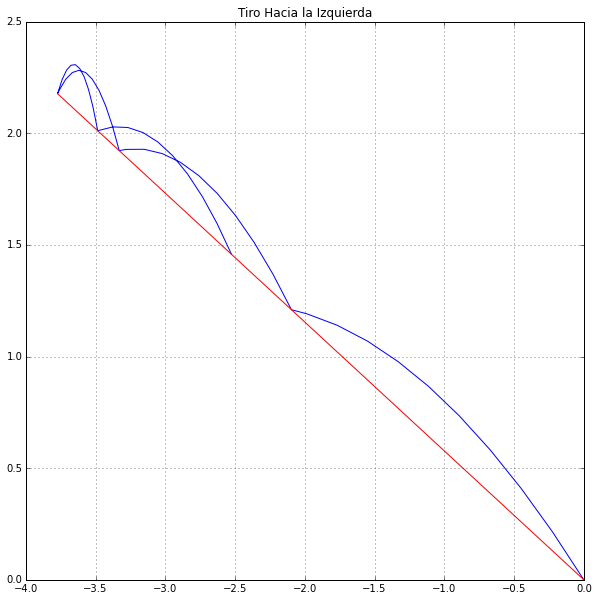

In [151]:
fig = plt.figure(figsize=(10,10))
plt.title("Tiro Hacia la Izquierda")

sol=trayectoria_con_rebote(inicio,alpha,fricV1,N,mi_dt=0.05)
x=np.linspace(min(sol[:,0]),max(sol[:,0]),10*N)
plano=inicio[1]-np.tan(np.pi*alpha/180)*x

plt.plot(sol[:,0],sol[:,1],color="blue")
plt.plot(x,plano,color="red")
plt.grid()

Vemos que la pelota se regresa, como habíamos esperado